## Prophetによる時系列データの予測

In [1]:
!pip install fbprophet

In [2]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 30.5 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=a3cfe72316d5ca02f8b2e94795a85ac2fcdff7595fbdbb6a62d88bfaa084bfb9
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import japanize_matplotlib 

In [4]:
!pip install plotly==5.1.0

     |████████████████████████████████| 20.6 MB 1.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [5]:
!pip install -U kaleido

     |████████████████████████████████| 79.9 MB 105 kB/s 


In [6]:
# Google Colab. やJupyter Lab.でplotlyを使用するための準備
import plotly.io as pio
from plotly.subplots import make_subplots
pio.renderers.default = "colab"

from plotly.offline import iplot, plot, download_plotlyjs, init_notebook_mode
import plotly.graph_objs as go

In [7]:
!pip install fpdf

# 「IPA」フォントをインストール
!apt-get -y install fonts-ipafont-gothic
# matplotlibのキャッシュをクリア
!rm /root/.cache/matplotlib/fontlist-v300.json

plt.rcParams['font.family']
plt.rcParams['font.family'] = 'IPAexGothic'

  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40725 sha256=2bc5c6ee4a974743b1fcfb939a536588c373ce733648c925fb7ff30151a9120c
  Stored in directory: /root/.cache/pip/wheels/d7/ca/c8/86467e7957bbbcbdf4cf4870fc7dc95e9a16404b2e3c3a98c3
Successfully built fpdf
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (8,366 kB/s)
Selecting previously unselec

In [8]:
from fbprophet import Prophet
from vega_datasets import data

try:
  import plotly.express as px
except ModuleNotFoundError:
  !pip install plotly --upgrade
  import plotly.express as px

import fbprophet.plot as fp
import plotly.io as pio
pio.renderers.default = "colab"

*   Prophetクラスのインスタンスmodelを生成
*   fitメソッドで学習（引数はデータフレーム）
*   predictメソッドで予測（引数は予測したい期間を含んだデータフレーム）

## 東京の月別最大電力実績2016年から2021年までのデータを取得する

In [9]:
data2016 = pd.read_csv('http://www.tepco.co.jp/forecast/html/images/juyo-result-2016-j.csv', encoding="shift-jis", header=1)
jr2016 = data2016.loc[:,["DATE", "実績(万kW)"]]
jr2016 = jr2016.set_index("DATE")
jr2016.head()

,実績(万kW)
DATE,
2016/4/1,3501
2016/4/2,3328
2016/4/3,3132
2016/4/4,3480
2016/4/5,3747


In [10]:
data2017 = pd.read_csv('http://www.tepco.co.jp/forecast/html/images/juyo-result-2017-j.csv', encoding="shift-jis", header=1)
jr2017 = data2017.loc[:,["DATE", "実績(万kW)"]]
jr2017 = jr2017.set_index("DATE")
jr2017.head()

,実績(万kW)
DATE,
2017/1/1,2935
2017/1/2,3086
2017/1/3,3240
2017/1/4,3571
2017/1/5,4142


In [11]:
data2018 = pd.read_csv('http://www.tepco.co.jp/forecast/html/images/juyo-result-2018-j.csv', encoding="shift-jis", header=1)
jr2018 = data2018.loc[:,["DATE", "実績(万kW)"]]
jr2018 = jr2018.set_index("DATE")
jr2018.head()

,実績(万kW)
DATE,
2018/1/1,3132
2018/1/2,3287
2018/1/3,3630
2018/1/4,3982
2018/1/5,4415


In [12]:
data2019 = pd.read_csv('http://www.tepco.co.jp/forecast/html/images/juyo-result-2019-j.csv', encoding="shift-jis", header=1)
jr2019 = data2019.loc[:,["DATE", "実績(万kW)"]]
jr2019 = jr2019.set_index("DATE")
jr2019.head()

,実績(万kW)
DATE,
2019/1/1,3166
2019/1/2,3300
2019/1/3,3553
2019/1/4,3793
2019/1/5,3614


In [13]:
data2020 = pd.read_csv('http://www.tepco.co.jp/forecast/html/images/juyo-result-2020-j.csv', encoding="shift-jis", header=1)
jr2020 = data2020.loc[:,["DATE", "実績(万kW)"]]
jr2020 = jr2020.set_index("DATE")
jr2020.head()

,実績(万kW)
DATE,
2020/1/1,3107
2020/1/2,3196
2020/1/3,3263
2020/1/4,3486
2020/1/5,3778


In [14]:
data2021 = pd.read_csv('http://www.tepco.co.jp/forecast/html/images/juyo-2021.csv', encoding="shift-jis", header=1)
jr2021 = data2021.loc[:,["DATE", "実績(万kW)"]]
jr2021 = jr2021.set_index("DATE")
print(jr2021)

            実績(万kW)
DATE               
2021/1/1       3184
2021/1/1       2978
2021/1/1       2834
2021/1/1       2743
2021/1/1       2697
...             ...
2021/12/31     3888
2021/12/31     3823
2021/12/31     3717
2021/12/31     3589
2021/12/31     3528

[8760 rows x 1 columns]


取得した電力実績の毎月の平均値を計算してリストに格納する

In [15]:
import datetime
import calendar

years = [2016, 2017, 2018, 2019, 2020, 2021]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
all_year_months = []
maa2016 = []
maa2017 = []
maa2018 = []
maa2019 = []
maa2020 = []
maa2021 = []

for year in years:
  year_f_day = []
  year_l_day = []
  for month in months:
    last_day = calendar.monthrange(year, month)[1]
    yfd = str(year) + "/" + str(month) + "/1"
    yld = str(year) + "/" + str(month) + "/" + str(last_day)
    year_f_day.append(yfd)
    year_l_day.append(yld)
    if year == 2016:
      if month == 1 or month == 2 or month == 3:
        continue
      maa_data = jr2016.loc[yfd:yld]
      month_achievement = maa_data.loc[:,["実績(万kW)"]]
      maa2016.append(maa_data.mean().values)
    elif year == 2017:
      maa_data = jr2017.loc[yfd:yld,["実績(万kW)"]]
      maa2017.append(maa_data.mean().values)
    elif year == 2018:
      maa_data = jr2018.loc[yfd:yld,["実績(万kW)"]]
      maa2018.append(maa_data.mean().values)
    elif year == 2019:
      maa_data = jr2019.loc[yfd:yld,["実績(万kW)"]]
      maa2019.append(maa_data.mean().values)
    elif year == 2020:
      maa_data = jr2020.loc[yfd:yld,["実績(万kW)"]]
      maa2020.append(maa_data.mean().values)
    else:
      maa_data = jr2021.loc[yfd:yld,["実績(万kW)"]]
      maa2021.append(maa_data.mean().values)
    all_year_months.append(str(year) + "/" + str(month))

月ごとの平均電力実績をDataFrame化する

In [16]:
maa = maa2016 + maa2017 + maa2018 + maa2019 + maa2020 + maa2021

In [17]:
df = pd.DataFrame({'DATE': all_year_months,
                   '平均電力実績(万kW)': maa})
print(df["平均電力実績(万kW)"].dtype)

# グラフ化するために平均電力実績をfloat型に変換する
epp = df.astype({"平均電力実績(万kW)": float})
print(epp)

object
       DATE  平均電力実績(万kW)
0    2016/4  3356.366667
1    2016/5  3349.032258
2    2016/6  3591.033333
3    2016/7  4070.774194
4    2016/8  4320.419355
..      ...          ...
64   2021/8  3604.869624
65   2021/9  2995.844444
66  2021/10  2914.094086
67  2021/11  3003.190278
68  2021/12  3497.452957

[69 rows x 2 columns]


In [18]:
# 平均電力実績を表示する棒グラフを作成
trace1 = go.Bar(
            x=epp["DATE"],
            y=epp["平均電力実績(万kW)"],
            name ="電力実績可視化グラフ"
       )

data=[trace1]

# レイアウト設定
layout = go.Layout(
    title="東京の平均電力実績"
)

fig = go.Figure(data, layout)
fig.show()

In [19]:
fig.write_image('/content/東京の平均電力実績_2016-2021.pdf')

In [20]:
fig.write_html('/content/東京の平均電力実績_2016-2021.html')

In [21]:
epp.rename(columns={"DATE": "ds"},
          inplace=True)
epp.rename(columns={"平均電力実績(万kW)": "y"},
          inplace=True)
model = Prophet()
model.fit(epp)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
future = model.make_future_dataframe(periods=12,freq='m')
future.tail()

,ds
76,2022-07-31
77,2022-08-31
78,2022-09-30
79,2022-10-31
80,2022-11-30


In [23]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
76,2022-07-31,3443.165267,3234.736142,3637.795611
77,2022-08-31,2796.361187,2592.806135,2999.136147
78,2022-09-30,2439.960756,2234.521307,2638.536461
79,2022-10-31,2315.148962,2118.145374,2516.824546
80,2022-11-30,2875.607628,2682.285816,3083.746540


In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-04-01,3871.717503,3150.728786,3574.571453,3871.717503,3871.717503,-504.908323,-504.908323,-504.908323,-504.908323,-504.908323,-504.908323,0.0,0.0,0.0,3366.809180
1,2016-05-01,3873.469055,3043.791554,3456.677246,3873.469055,3873.469055,-617.197974,-617.197974,-617.197974,-617.197974,-617.197974,-617.197974,0.0,0.0,0.0,3256.271081
2,2016-06-01,3875.278992,3466.947607,3872.472019,3875.278992,3875.278992,-202.989509,-202.989509,-202.989509,-202.989509,-202.989509,-202.989509,0.0,0.0,0.0,3672.289483
3,2016-07-01,3877.030545,3923.945961,4339.826106,3877.030545,3877.030545,264.227936,264.227936,264.227936,264.227936,264.227936,264.227936,0.0,0.0,0.0,4141.258480
4,2016-08-01,3878.840482,4290.617807,4700.013231,3878.840482,3878.840482,611.862444,611.862444,611.862444,611.862444,611.862444,611.862444,0.0,0.0,0.0,4490.702926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2022-07-31,2836.190661,3234.736142,3637.795611,2818.507629,2855.827341,606.974607,606.974607,606.974607,606.974607,606.974607,606.974607,0.0,0.0,0.0,3443.165267
77,2022-08-31,2800.215711,2592.806135,2999.136147,2778.353491,2824.096032,-3.854524,-3.854524,-3.854524,-3.854524,-3.854524,-3.854524,0.0,0.0,0.0,2796.361187
78,2022-09-30,2765.401244,2234.521307,2638.536461,2739.797552,2793.150555,-325.440489,-325.440489,-325.440489,-325.440489,-325.440489,-325.440489,0.0,0.0,0.0,2439.960756
79,2022-10-31,2729.426295,2118.145374,2516.824546,2698.878299,2761.821841,-414.277333,-414.277333,-414.277333,-414.277333,-414.277333,-414.277333,0.0,0.0,0.0,2315.148962


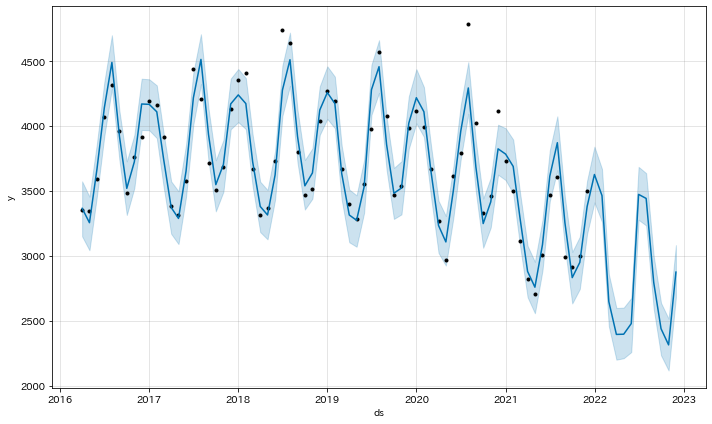

In [25]:
model.plot(forecast);

In [26]:
import matplotlib.font_manager as font_manager

fig = fp.plot_plotly(model, forecast) 
fig.update_layout(
    title="<b>東京の平均電力実績_2016-2021と2022の予測</b>"
)
fig.update_yaxes(title_text="<b>平均電力実績(万kW)</b>")
fig.update_xaxes(title="<b>年月</b>")

# このまま出力すると文字化けしてしまうので日本語のフォントを設定する
font = font_manager.FontProperties(
    family="IPAGothic",
    size=30
)
fig.show()

In [27]:
fig.to_image(format="pdf", engine="kaleido")

b'%PDF-1.4\n%\xd3\xeb\xe9\xe1\n1 0 obj\n<</Creator (Chromium)\n/Producer (Skia/PDF m88)\n/CreationDate (D:20220124091240+00\'00\')\n/ModDate (D:20220124091240+00\'00\')>>\nendobj\n3 0 obj\n<</ca 1\n/BM /Normal>>\nendobj\n4 0 obj\n<</CA 1\n/ca 1\n/LC 0\n/LJ 0\n/LW 1\n/ML 4\n/SA true\n/BM /Normal>>\nendobj\n5 0 obj\n<</ca .2\n/BM /Normal>>\nendobj\n6 0 obj\n<</CA 1\n/ca 1\n/LC 0\n/LJ 0\n/LW 2\n/ML 2\n/SA true\n/BM /Normal>>\nendobj\n8 0 obj\n<</ca 0\n/BM /Normal>>\nendobj\n12 0 obj\n<</Filter /FlateDecode\n/Length 19483>> stream\nx\x9c\xed}\xdb\xae%\xb9q\xe5\xfb\xf9\x8a\xfdl\xe0\xa4x\xbf\x00\xc6\x00\xdd\x96\xba\x9f%5\xe0\x0f(\xcb\x12\x8c]\x06F\xf3\xff\xc0\xac\x15\xc1\xccd\xee\xcd,\xb5\xe5v\x1b\xb0C\rU\x9d\x8a\x93\x19$\x83\xc1\x15\x17\x06\x99[\x88]\xfe\xf7p\xf8\xefs\x9b\xfe\x99\xb2{|\xf9\xfa\xf1\x7f?\xf8\x9b\xd0|\xd8\xf2\xc3\xb7\x9a\x1f\x7f\xfd\xd3\xc7?\xff\xc3\xe3\xdf\xf1\x9b\xb8\xf9\x90\xe5\xcd\xf3\'\xbc\xe2\x1f\xfc\xef\x0f?>\xf4\x87\xbf\xfe\xf9\xe37?\xc6\xc7\x9f\xff\x9fp\xea\xce=\n\xfe

In [28]:
fig.write_image('/content/東京の平均電力実績_2016-2021と2022の予測.pdf')

In [29]:
fig.write_html('/content/東京の平均電力実績_2016-2021と2022の予測.html')